In [5]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
from matplotlib import cbook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from helpers import *

In [7]:
def main():
    # this is just an example of how we can use the above helpers to create a new relit image
    # right now it just creates an ambient light from all directions

    path = ('./data/church/')
    img = plt.imread(path + 'input.png')

    # Get the lights for each direction we want to use for ambient light
    top_light = get_new_light_dir([0, -1, 0], img)
    bottom_light = get_new_light_dir([0, 1, 0.3], img)
    left_light = get_new_light_dir([1, 0.3, 0.3], img)
    right_light = get_new_light_dir([-1, 0.3, 0.3], img)

    # Get the shading with each new light direction
    top_shading = get_shading(top_light, path)
    bottom_shading = get_shading(bottom_light, path)
    left_shading = get_shading(left_light, path)
    right_shading = get_shading(right_light, path)

    # Combine each shading (this is where you would include the main light source as well)
    shading = [top_shading, bottom_shading, left_shading, right_shading]
    multipliers = [0.2, 0.2, 0.5, 0.5]

    shading = combine_shading(shading, multipliers)

    # Finally, create the image
    new_image = get_image(shading, path)

    f = plt.figure()

    # set width, height, dpi
    f.set_dpi(120)
    plt.axis('off')
    plt.imshow(new_image)

/media/storage/PyCharmProjects/CMPT769_project/helpers.py:83: RuntimeWarning: invalid value encountered in power
  new_image = new_image ** 0.4545  # gamma correct


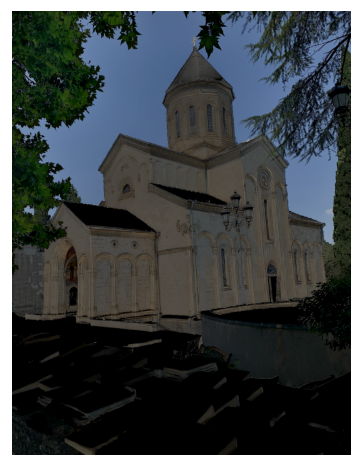

In [8]:
main()